Detected 81 anomalies.


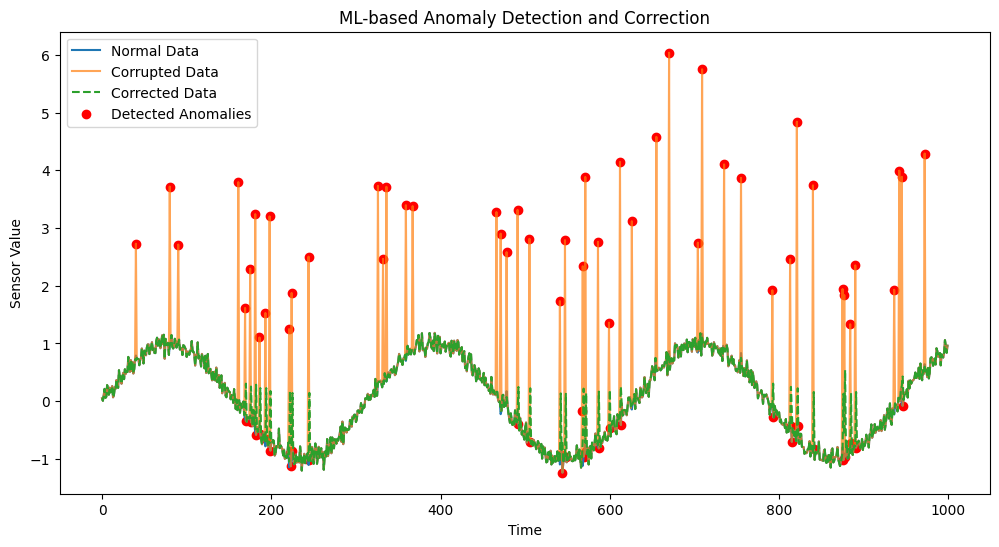

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic "normal" sensor data
np.random.seed(42)
time = np.arange(1000)
normal_data = np.sin(0.02 * time) + np.random.normal(0, 0.1, size=time.shape)

# Generate corrupted data by injecting anomalies
corrupted_data = normal_data.copy()
anomaly_indices = np.random.choice(time, size=50, replace=False)
corrupted_data[anomaly_indices] += np.random.normal(3, 1, size=anomaly_indices.shape)  # big spikes

# Prepare dataset for ML: use past 3 values to predict current value
def create_features(data, window=3):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Features and labels from corrupted data
window_size = 3
X_corrupt, y_corrupt = create_features(corrupted_data, window=window_size)
X_normal, y_normal = create_features(normal_data, window=window_size)

# Train Random Forest on normal data (supervised)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_normal, y_normal)

# Predict values for corrupted data points
y_pred = model.predict(X_corrupt)

# Detect anomalies where difference between predicted and observed is large
errors = np.abs(y_pred - y_corrupt)
threshold = 0.5  # anomaly detection threshold
anomalies = errors > threshold

print(f"Detected {np.sum(anomalies)} anomalies.")

# Correct corrupted data using model predictions at anomaly points
corrected_data = corrupted_data.copy()
corrected_data[window_size:] = np.where(anomalies, y_pred, corrupted_data[window_size:])

# Plot results
plt.figure(figsize=(12,6))
plt.plot(time, normal_data, label='Normal Data')
plt.plot(time, corrupted_data, label='Corrupted Data', alpha=0.7)
plt.plot(time, corrected_data, label='Corrected Data', linestyle='--')
plt.scatter(time[window_size:][anomalies], corrupted_data[window_size:][anomalies], color='red', label='Detected Anomalies')
plt.legend()
plt.title("ML-based Anomaly Detection and Correction")
plt.xlabel("Time")
plt.ylabel("Sensor Value")

# Save figure
plt.savefig('/home/rbakyayita/Documents/MScIS-thesis/mscis-thesis/figures/ml_anomaly_correction.png', dpi=300)

plt.show()